In [1]:
import os
import geopandas

import json
import topojson

from IPython.display import SVG, display
from shapely import geometry
%matplotlib inline

### natural earth low resolution

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


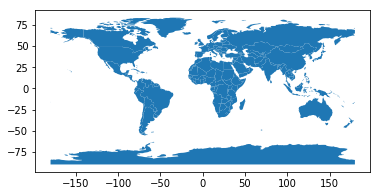

In [2]:
data = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data.plot()
data.head()

In [12]:
%%prun -D topo_profile.pstats -q
# apply topolgy where vertices are snapped to a grid before applying topology (quantization)
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

 
*** Profile stats marshalled to file 'topo_profile.pstats'. 


In [12]:
!!/Users/mattijnvanhoek/gprof2dot/gprof2dot.py -f pstats topo_profile.pstats | dot -Tsvg -o output.svg

[]

In [ ]:
# write computed topology to file
tj_path = 'tests/files_topojson/naturalearth_lowres.topojson'
with open(tj_path, 'w') as fp:
    json.dump(tj_data, fp)

In [ ]:
# compare file sizes of the geojson and topjson file
gj_path = 'tests/files_geojson/naturalearth_lowres.geojson'
tj_kb = os.path.getsize(tj_path)/1000
gj_kb = os.path.getsize(gj_path)/1000
print('topojson naturalearth_loweres: {}kb\ngeojson naturalearth_loweres: {}kb'.format(tj_kb, gj_kb))

In [ ]:
# read the saved topojson file into geopandas and see that it works!
data_tj = geopandas.read_file(tj_path)
data_tj.plot()
data_tj.head()

In [ ]:
# for gdf_row in data_tj.iterrows():
#     print(gdf_row[1]['name'])
#     g1_svg = gdf_row[1].geometry._repr_svg_() 
#     display(SVG(g1_svg))

In [ ]:
%%prun -l 10
# present timing of applying the whole topology
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

In [ ]:
%%prun -l 10
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=1e4)
cu = topojson.cut(jo)
de = topojson.dedup(cu)
ha = topojson.hashmap(de)